In [63]:
# Importing libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import fileinput
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import csv

In [64]:
# import data into pandas dataframe

df = pd.read_csv('processed.cleveland.csv')

In [65]:
df

,age,male,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [66]:
# Checking correlation of target variable with other variables

corr = df.corr()['target'].abs().sort_values()
corr

fbs         0.059186
chol        0.070909
trestbps    0.157754
restecg     0.183696
age         0.222853
male        0.224469
slope       0.377957
exang       0.397057
cp          0.407075
thalach     0.415040
oldpeak     0.504092
target      1.000000
Name: target, dtype: float64

In [50]:
# remove rows with '?' and convert to float64

df = df[~df['thal'].isin(['?'])]
df = df[~df['ca'].isin(['?'])]
df[['thal', 'ca']] = df[['thal', 'ca']].astype('float64')


In [67]:
# convert target column to 0 or 1

df.loc[df['target'] > 0, ['target']] = 1

df

,age,male,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


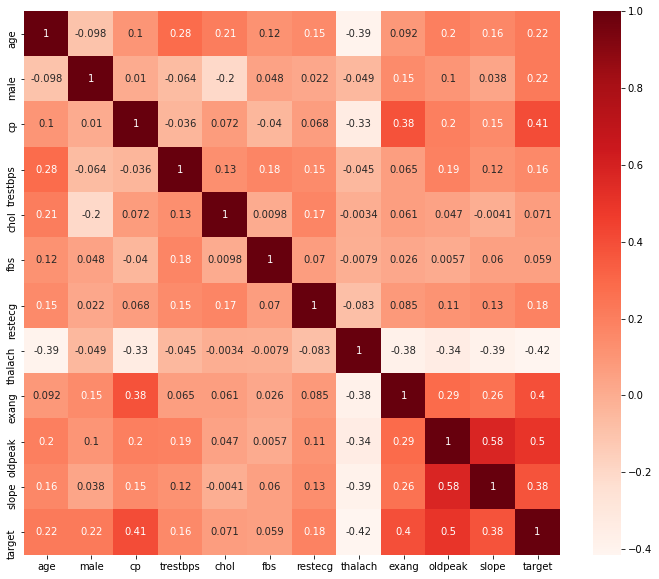

In [57]:
#Pearson Correlation Matrix

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [68]:
#Correlation with output variable

cor_target = abs(cor["target"])

cor_target

age         0.222853
male        0.224469
cp          0.407075
trestbps    0.157754
chol        0.070909
fbs         0.059186
restecg     0.183696
thalach     0.415040
exang       0.397057
oldpeak     0.504092
slope       0.377957
target      1.000000
Name: target, dtype: float64

In [59]:
#Selecting highly correlated features from dataframe

irrelevant_features = cor_target[cor_target<0.2]
print(irrelevant_features)
df = df.drop(["trestbps","chol","fbs","restecg"], axis=1)
print(df.head())

trestbps    0.157754
chol        0.070909
fbs         0.059186
restecg     0.183696
Name: target, dtype: float64
    age  male   cp  thalach  exang  oldpeak  slope   ca thal  target
0  63.0   1.0  1.0    150.0    0.0      2.3    3.0  0.0  6.0       0
1  67.0   1.0  4.0    108.0    1.0      1.5    2.0  3.0  3.0       2
2  67.0   1.0  4.0    129.0    1.0      2.6    2.0  2.0  7.0       1
3  37.0   1.0  3.0    187.0    0.0      3.5    3.0  0.0  3.0       0
4  41.0   0.0  2.0    172.0    0.0      1.4    1.0  0.0  3.0       0


In [35]:
data_cols = [col for col in df.columns if col != "target"]

# create training, testing, validation datasets
df_shfl = shuffle(df, random_state=443)
X = df_shfl[data_cols].values
y = df_shfl["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=80)

### 1. neural network

total loss in epoch 250 = 0.5276, validation loss = 0.5266, lr = 1.00e-04
total loss in epoch 500 = 0.3917, validation loss = 0.4169, lr = 1.00e-04
total loss in epoch 750 = 0.3769, validation loss = 0.3718, lr = 1.00e-04
total loss in epoch 1000 = 0.3376, validation loss = 0.3477, lr = 1.00e-04
total loss in epoch 1250 = 0.3331, validation loss = 0.3344, lr = 1.00e-04
total loss in epoch 1500 = 0.3163, validation loss = 0.3275, lr = 1.00e-04
total loss in epoch 1750 = 0.3019, validation loss = 0.3236, lr = 1.00e-04
total loss in epoch 2000 = 0.2908, validation loss = 0.3192, lr = 1.00e-04
total loss in epoch 2250 = 0.3139, validation loss = 0.3163, lr = 1.00e-04
total loss in epoch 2500 = 0.3151, validation loss = 0.3224, lr = 1.00e-04
Validation loss not improving for 500 epochs, stopping...
Accuracy = 93.33%


,T,F
P,32,2
N,2,24


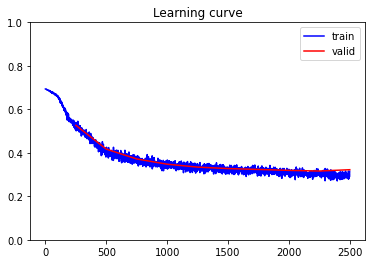

In [36]:
num_epochs = 5000
log_inteval = 250
total_losses = []
total_val_losses = []
lr = 1e-4
lr_decay_inteval = 2500
lr_decay_rate = 0.3


model = nn.Sequential(
    nn.Linear(len(data_cols), 80),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(80, 256),
    nn.ReLU(),
    nn.Dropout(0.6),
    nn.Linear(256, 1),
)
loss_fn = torch.nn.BCELoss()
opt = optim.Adam(model.parameters(), lr=lr)

def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.xavier_normal_(m.weight, 0.06)

model.apply(init_normal)

for epoch in range(1, num_epochs+1):
    y_pred = model(torch.tensor(X_train, dtype=torch.float))
    y_pred = torch.sigmoid(y_pred)
    opt.zero_grad()
    loss = loss_fn(y_pred[:, 0], torch.tensor(y_train, dtype=torch.float))
    loss.backward()
    opt.step()
    total_losses.append(loss.item())
    if epoch % log_inteval == 0: # Logging
        epochs_ran = epoch
        model.eval()
        with torch.no_grad():
            y_pred = model(torch.tensor(X_test, dtype=torch.float))
            y_pred = torch.sigmoid(y_pred)
            val_loss = loss_fn(y_pred[:, 0], torch.tensor(y_test, dtype=torch.float))
            total_val_losses.append(val_loss.item())
        model.train()
        print(f"total loss in epoch {epoch} = {'%.4f'%loss}, validation loss = {'%.4f'%val_loss}, lr = {'%.2e'%lr}")
        if len(total_val_losses) > 3 and val_loss.item() > total_val_losses[-2] and val_loss.item() > total_val_losses[-3]:
            print(f"Validation loss not improving for {log_inteval * 2} epochs, stopping...")
            break
    if epoch % lr_decay_inteval == 0: # Learning rate decay
        lr *= lr_decay_rate
        for param_group in opt.param_groups:
            param_group['lr'] = lr
              
plt.plot(total_losses, 'b', label="train")
plt.plot(np.array(range(epochs_ran // log_inteval)) * log_inteval + log_inteval, total_val_losses, 'r', label="valid")
plt.ylim([0, 1])
plt.title("Learning curve")
plt.legend()
              
with torch.no_grad():
    model.eval()
    y_pred = model(torch.tensor(X_test, dtype=torch.float))
    y_pred_lbl = np.where(y_pred.numpy() > 0, 1, 0)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_lbl), columns=["T", "F"], index=["P", "N"])
print("Accuracy = %.2f%%" % ((cm.iloc[1, 1] + cm.iloc[0, 0]) / cm.values.sum() * 100))
cm
       

### 2. Support Vector Machine

In [37]:

# update test and train data (it currently includes validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

print("Support Vector Machine Results")
print(classification_report(y_test,y_pred))

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["T", "F"], index=["P", "N"])
print("Accuracy = %.2f%%" % ((cm.iloc[1, 1] + cm.iloc[0, 0]) / cm.values.sum() * 100))
cm

Support Vector Machine Results
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        34
           1       0.80      0.77      0.78        26

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60

Accuracy = 81.67%


,T,F
P,29,5
N,6,20


### 3. Random Forest

In [38]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);
y_pred = rf.predict(X_test)

print("Random Forest Results")
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["T", "F"], index=["P", "N"])
print("Accuracy = %.2f%%" % ((cm.iloc[1, 1] + cm.iloc[0, 0]) / cm.values.sum() * 100))
print(cm)

Random Forest Results
Accuracy = 80.00%
    T   F
P  27   7
N   5  21


###  4. Decision Tree

In [43]:

# Import the model we are using
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_split=30)

# Train the model on training data
dt.fit(X_train, y_train);
y_pred = dt.predict(X_test)

print("Decision Tree Results")
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["T", "F"], index=["P", "N"])
print("Accuracy = %.2f%%" % ((cm.iloc[1, 1] + cm.iloc[0, 0]) / cm.values.sum() * 100))
print(cm)


Decision Tree Results
Accuracy = 73.33%
    T   F
P  25   9
N   7  19


### 5. Naive Bayes

In [44]:

from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred= model.predict(X_test)

print("Naive Bayes Results")
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["T", "F"], index=["P", "N"])
print("Accuracy = %.2f%%" % ((cm.iloc[1, 1] + cm.iloc[0, 0]) / cm.values.sum() * 100))
print(cm)

Naive Bayes Results
Accuracy = 80.00%
    T   F
P  27   7
N   5  21
